In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [ ]:
df['who'].value_counts()


,count
who,
man,537
woman,271
child,83


In [ ]:
df= df[['survived','pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked','who']]
df.dropna(inplace= True)
# df.drop(['class', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'])

/tmp/ipython-input-2179801232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace= True)


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   who       712 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


<Axes: xlabel='age', ylabel='survived'>

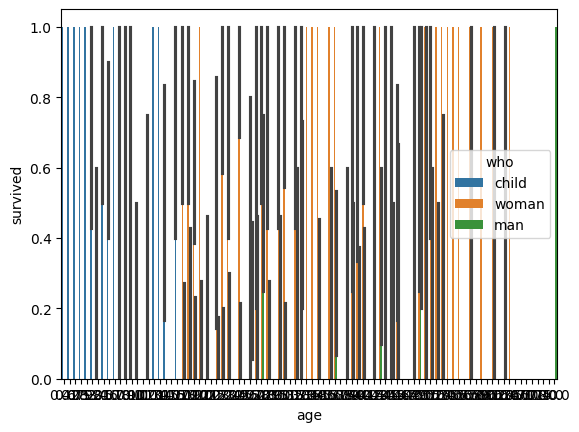

In [ ]:
sns.barplot(data=df,x='age', y='survived', hue='who')

<Axes: xlabel='embarked', ylabel='survived'>

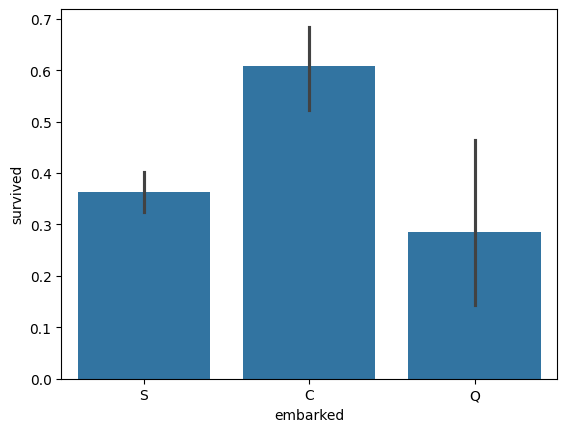

In [ ]:
sns.barplot(data=df,x='embarked', y='survived')

<Axes: xlabel='sibsp', ylabel='survived'>

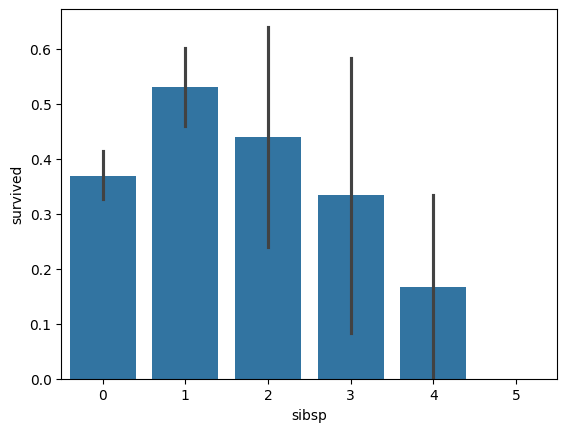

In [ ]:
sns.barplot(data=df,x='sibsp', y='survived')

<Axes: ylabel='fare'>

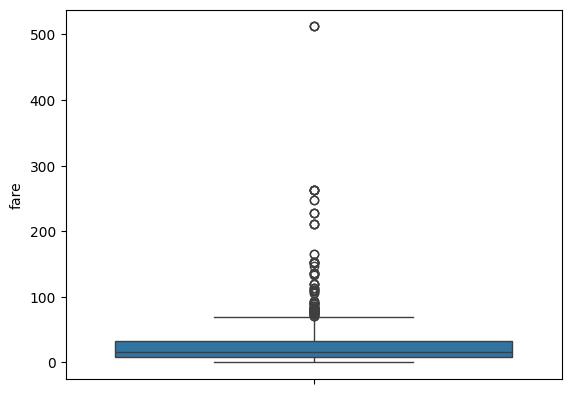

In [ ]:
# sns.scatterplot(data=df, x='age', y='fare')
sns.boxplot(data=df, y='fare')

In [ ]:
q1= df['fare'].quantile(0.25)
q3= df['fare'].quantile(0.75)
IQR= q3-q1
l_bound= q1-1.5*IQR
u_bound= q3+1.5*IQR
print(l_bound, u_bound)
df= df[(df['fare']>= l_bound) & (df['fare'] <= u_bound)]

-29.374999999999996 70.425


<Axes: ylabel='fare'>

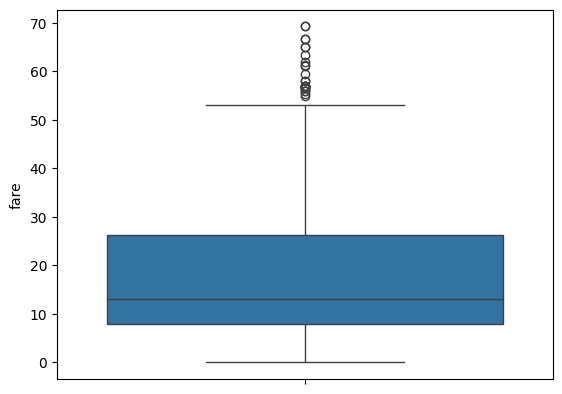

In [ ]:
sns.boxplot(data=df, y='fare')

In [ ]:
df.shape

(617, 9)

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,0.356564,2.423015,28.919368,0.487844,0.398703,19.026803
std,0.479373,0.741393,14.326895,0.953598,0.846995,14.282146
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,26.283300
max,1.000000,3.000000,80.000000,5.000000,6.000000,69.300000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  617 non-null    int64  
 1   pclass    617 non-null    int64  
 2   sex       617 non-null    object 
 3   age       617 non-null    float64
 4   sibsp     617 non-null    int64  
 5   parch     617 non-null    int64  
 6   fare      617 non-null    float64
 7   embarked  617 non-null    object 
 8   who       617 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 48.2+ KB


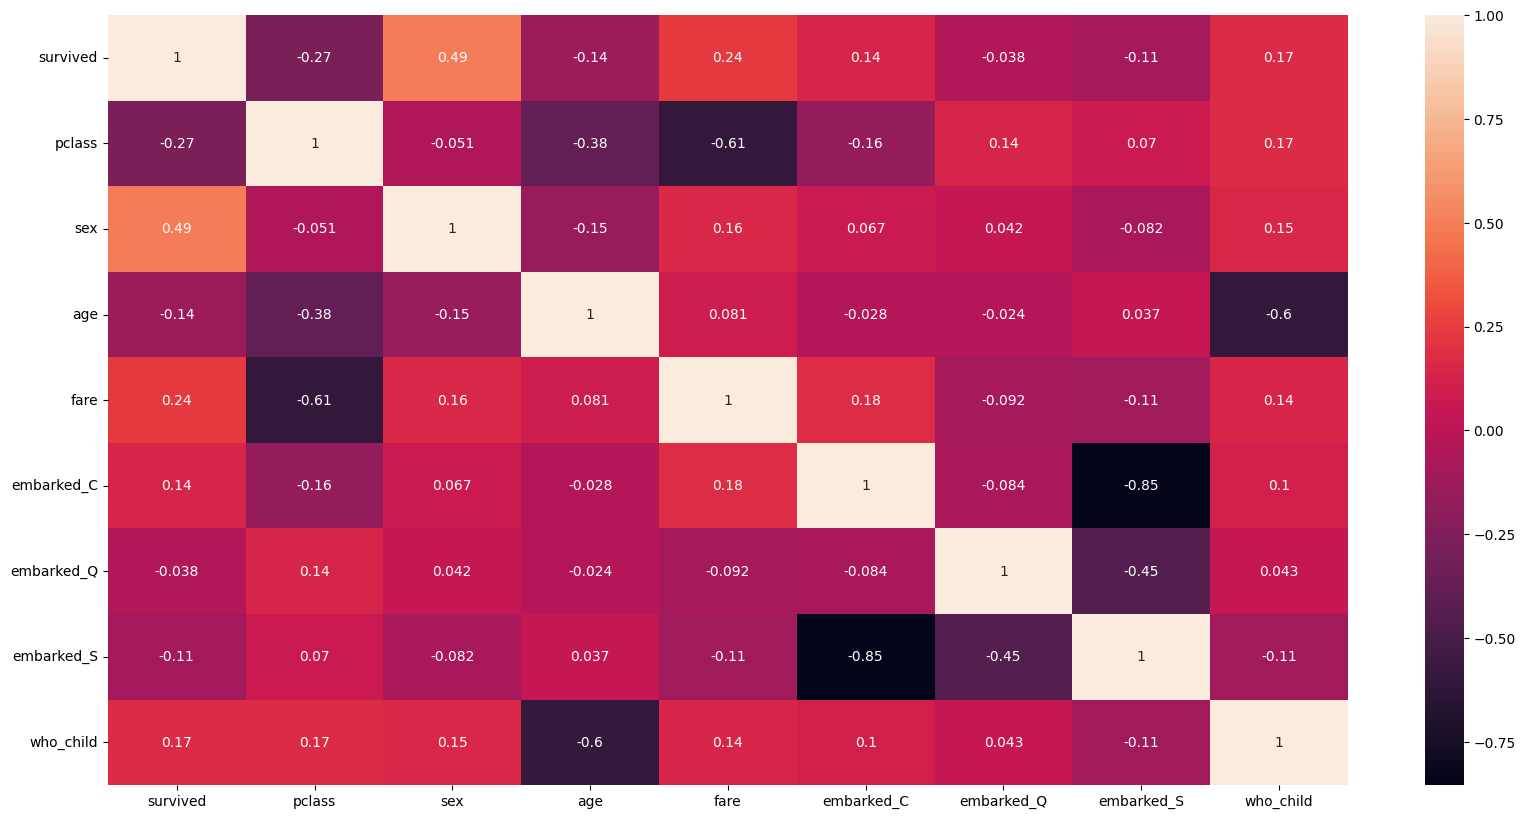

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
# sns.barplot(data=df, x='age', y='survived')
plt.show()

<Axes: xlabel='pclass', ylabel='survived'>

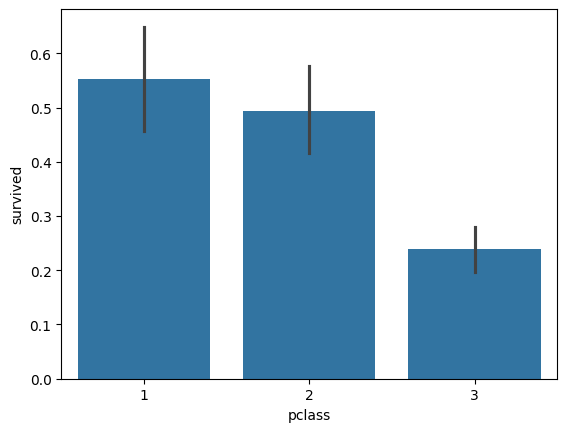

In [ ]:
sns.barplot(data=df, x='pclass', y='survived')

<Axes: xlabel='embarked', ylabel='pclass'>

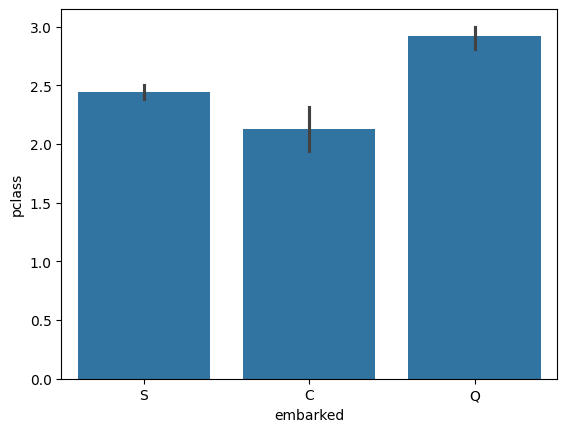

In [ ]:
sns.barplot(data=df, x='embarked', y='pclass')

In [ ]:
df= pd.get_dummies(df, columns=['embarked', 'who'])

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,male,22.0,1,0,7.2500,False,False,True,False,True,False
2,1,3,female,26.0,0,0,7.9250,False,False,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,False,False,True,False,False,True
4,0,3,male,35.0,0,0,8.0500,False,False,True,False,True,False
6,0,1,male,54.0,0,0,51.8625,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,False,True,False,False,False,True
886,0,2,male,27.0,0,0,13.0000,False,False,True,False,True,False
887,1,1,female,19.0,0,0,30.0000,False,False,True,False,False,True
889,1,1,male,26.0,0,0,30.0000,True,False,False,False,True,False


In [ ]:
df.drop(['who_man', 'who_woman', 'parch', 'sibsp'], axis=1, inplace=True)

In [ ]:
df['sex']= df['sex'].map({'male':0, 'female':1})
df['who_child']= df['who_child'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    617 non-null    int64  
 1   pclass      617 non-null    int64  
 2   sex         617 non-null    int64  
 3   age         617 non-null    float64
 4   fare        617 non-null    float64
 5   embarked_C  617 non-null    bool   
 6   embarked_Q  617 non-null    bool   
 7   embarked_S  617 non-null    bool   
 8   who_child   617 non-null    int64  
dtypes: bool(3), float64(2), int64(4)
memory usage: 35.5 KB


In [ ]:
df[('embarked_C')]= df[('embarked_C')].astype(int)
df[('embarked_Q')]= df[('embarked_Q')].astype(int)
df[('embarked_S')]= df[('embarked_S')].astype(int)


In [ ]:
df

,survived,pclass,sex,age,fare,embarked_C,embarked_Q,embarked_S,who_child
0,0,3,0,22.0,7.2500,0,0,1,0
2,1,3,1,26.0,7.9250,0,0,1,0
3,1,1,1,35.0,53.1000,0,0,1,0
4,0,3,0,35.0,8.0500,0,0,1,0
6,0,1,0,54.0,51.8625,0,0,1,0
...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,0,1,0,0
886,0,2,0,27.0,13.0000,0,0,1,0
887,1,1,1,19.0,30.0000,0,0,1,0
889,1,1,0,26.0,30.0000,1,0,0,0


In [ ]:
X = df.drop('survived', axis=1)
Y = df['survived']

In [ ]:
X.shape, Y.shape

((617, 8), (617,))

<Axes: >

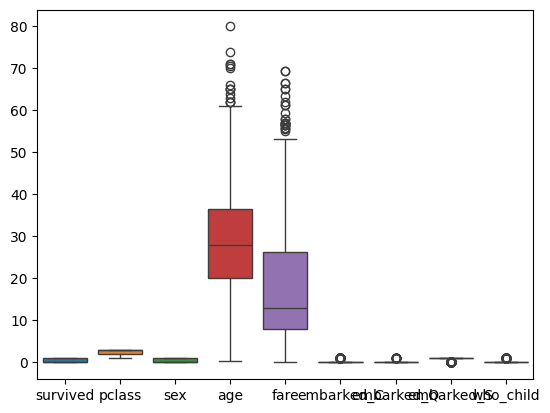

In [ ]:
sns.boxplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

<Axes: >

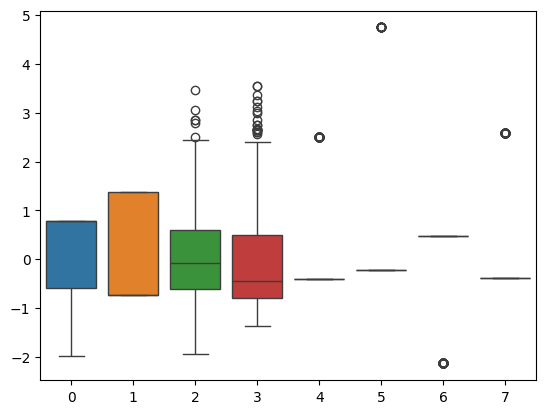

In [ ]:
sns.boxplot(x_train)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((493, 8), (124, 8), (493,), (124,))

In [ ]:
from sklearn.svm import SVC
model_rbf= SVC(
    kernel= 'rbf',
    C= 10.0,
    gamma= 'scale'
)
model_rbf.fit(x_train, y_train)

SVC(C=10.0)

In [ ]:
model_rbf.score(x_train, y_train), model_rbf.score(x_test, y_test)

(0.8559837728194726, 0.8225806451612904)

In [ ]:
y_pred= model_rbf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print("Accuracy Score\n",accuracy_score(y_test, y_pred))
print("Classification Report\n",classification_report(y_test, y_pred))


Confusion Matrix
 [[79  6]
 [16 23]]
Accuracy Score
 0.8225806451612904
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        85
           1       0.79      0.59      0.68        39

    accuracy                           0.82       124
   macro avg       0.81      0.76      0.78       124
weighted avg       0.82      0.82      0.81       124



In [ ]:
model_linear= SVC(
    kernel= 'linear'
)
model_linear.fit(x_train, y_train)
y_pred= model_linear.predict(x_test)
model_linear.score(x_train, y_train), model_linear.score(x_test, y_test)

(0.768762677484787, 0.782258064516129)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print("Accuracy Score\n",accuracy_score(y_test, y_pred))
print("Classification Report\n",classification_report(y_test, y_pred))

Confusion Matrix
 [[74 11]
 [16 23]]
Accuracy Score
 0.782258064516129
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.87      0.85        85
           1       0.68      0.59      0.63        39

    accuracy                           0.78       124
   macro avg       0.75      0.73      0.74       124
weighted avg       0.78      0.78      0.78       124



In [ ]:
model_poly= SVC(
    kernel= 'poly'
)
model_poly.fit(x_train, y_train)
y_pred= model_poly.predict(x_test)
model_poly.score(x_train, y_train), model_poly.score(x_test, y_test)

(0.8356997971602435, 0.7983870967741935)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print("Accuracy Score\n",accuracy_score(y_test, y_pred))
print("Classification Report\n",classification_report(y_test, y_pred))

Confusion Matrix
 [[79  6]
 [19 20]]
Accuracy Score
 0.7983870967741935
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.93      0.86        85
           1       0.77      0.51      0.62        39

    accuracy                           0.80       124
   macro avg       0.79      0.72      0.74       124
weighted avg       0.79      0.80      0.79       124



In [ ]:
model_sigmoid= SVC(
    kernel= 'sigmoid'
)
model_sigmoid.fit(x_train, y_train)
y_pred= model_sigmoid.predict(x_test)
model_sigmoid.score(x_train, y_train), model_sigmoid.score(x_test, y_test)

(0.6896551724137931, 0.6612903225806451)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print("Accuracy Score\n",accuracy_score(y_test, y_pred))
print("Classification Report\n",classification_report(y_test, y_pred))

Confusion Matrix
 [[62 23]
 [19 20]]
Accuracy Score
 0.6612903225806451
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        85
           1       0.47      0.51      0.49        39

    accuracy                           0.66       124
   macro avg       0.62      0.62      0.62       124
weighted avg       0.67      0.66      0.67       124



In [ ]:
# model.predict([[3,1,26.0,7.9250,0,0,1,0]])
model.predict([[2,    1,  45.0,  26.2500,           0,           0,           1,          0]])

array([1])